<a href="https://colab.research.google.com/github/Ea-mjolnir/Adjustment-computation-1/blob/main/Munich_Fiber_Optic_Analysis_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install geospatial libraries
!pip install geopandas pandas matplotlib seaborn folium shapely osmnx

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import shapely
import osmnx as ox

print("Libraries installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 1.8 MB/s eta 0:00:00
Libraries installed successfully!


In [2]:
import osmnx as ox

# Download Munich roads
place_name = "Munich, Bavaria, Germany"
roads = ox.graph_from_place(place_name, network_type="all")
roads_gdf = ox.graph_to_gdfs(roads, nodes=False)
roads_gdf = roads_gdf.to_crs(epsg=25832)
roads_gdf.to_file("munich_roads.geojson", driver="GeoJSON")
print("Roads downloaded and saved!")

# Download commercial buildings
tags = {"building": "commercial"}
buildings = ox.features_from_place(place_name, tags=tags)
buildings = buildings[buildings.geom_type == "Polygon"]  # Filter polygons only
buildings = buildings.to_crs(epsg=25832)  # Reproject to UTM zone 32N
buildings.to_file("munich_commercial_buildings.geojson", driver="GeoJSON")
print("Commercial buildings downloaded and saved!")

# Summarize data
print("Roads summary:")
print(roads_gdf.head())
print(f"Total roads: {len(roads_gdf)}")
print("\nBuildings summary:")
print(buildings.head())
print(f"Total commercial buildings: {len(buildings)}")

# Calculate total area
total_area = buildings.geometry.area.sum() / 1e6  # Convert m² to km²
print(f"Total commercial building area in Munich: {total_area:.2f} km²")
with open("analysis_results.txt", "w") as f:
    f.write(f"Total commercial building area in Munich: {total_area:.2f} km²\n")

# Create interactive map
m = folium.Map(location=[48.137154, 11.576124], zoom_start=12, tiles="CartoDB positron")
folium.GeoJson(
    buildings,
    style_function=lambda x: {"fillColor": "blue", "color": "blue", "weight": 1, "fillOpacity": 0.5}
).add_to(m)
folium.GeoJson(
    roads_gdf,
    style_function=lambda x: {"color": "gray", "weight": 1}
).add_to(m)
m.save("munich_map.html")
print("Map saved as munich_map.html")


Roads downloaded and saved!
Commercial buildings downloaded and saved!
Roads summary:
                          osmid       highway maxspeed                 name  \
u      v          key                                                         
128236 1399723741 0     4055519  unclassified       30          Pirolstraße   
       1097240022 0     4872976     secondary       50  Lochhausener Straße   
       321852692  0     4872976     secondary       50  Lochhausener Straße   
128238 4009244673 0     2398600     secondary       50       Sumpfmeisenweg   
       2512300883 0    75097452     secondary       30       Sumpfmeisenweg   

                       oneway reversed     length lanes      ref  \
u      v          key                                              
128236 1399723741 0     False     True   7.215758   NaN      NaN   
       1097240022 0     False    False  17.320692     2  St 2345   
       321852692  0     False     True  38.467055     2  St 2345   
128238 4009244673 0 

# Geospatial Concepts
- **Coordinate Reference System (CRS)**: Koordinatenreferenzsystem (z.B. EPSG:25832 für Deutschland).
- **Buffering**: Pufferung (z.B. 500m um Gebäude).
- **Spatial Join**: Räumlicher Join (z.B. Straßen in Pufferzonen finden).
- **Vector Data**: Vektordaten (Punkte, Linien, Polygone).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


2025-06-19 16:27:52.479 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Loading munich_commercial_buildings.geojson from /content/...
Buildings non-geometry columns and unique types:
element: [<class 'str'>]
id: [<class 'int'>]
addr:city: [<class 'NoneType'> <class 'str'>]
addr:country: [<class 'NoneType'> <class 'str'>]
addr:housenumber: [<class 'NoneType'> <class 'str'>]
addr:street: [<class 'NoneType'> <class 'str'>]
building: [<class 'str'>]
name: [<class 'str'> <class 'NoneType'>]
building:levels: [<class 'str'> <class 'NoneType'>]
building:material: [<class 'NoneType'> <class 'str'>]
layer: [<class 'NoneType'> <class 'str'>]
roof:shape: [<class 'str'> <class 'NoneType'>]
addr:postcode: [<class 'NoneType'> <class 'str'>]
alt_name: [<class 'NoneType'> <class 'str'>]
office: [<class 'NoneType'> <class 'str'>]
old_name: [<class 'NoneType'> <class 'str'>]
phone: [<class 'NoneType'> <class 'str'>]
roof:colour: [<class 'NoneType'> <class 'str'>]
roof:levels: [<class 'str'> <class 'NoneType'>]
website: [<class 'NoneType'> <class 'str'>]
source: [<class 'None

2025-06-19 16:27:56.683 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:27:56.684 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:27:56.685 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:27:56.763 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-19 16:27:56.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:27:56.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Loading munich_roads.geojson from /content/...


Roads non-geometry columns and unique types:
u: [<class 'int'>]
v: [<class 'int'>]
key: [<class 'int'>]
osmid: [<class 'str'>]
oneway: [<class 'bool'>]
reversed: [<class 'str'>]
length: [<class 'float'>]
bridge: [<class 'NoneType'> <class 'str'>]
junction: [<class 'NoneType'> <class 'str'>]
est_width: [<class 'NoneType'> <class 'str'>]
area: [<class 'NoneType'> <class 'str'>]
Found 1491218 roads within 500m of commercial buildings
Total road length in buffer zones: 55151.42 km
Spatial join map saved as munich_spatial_join_map.html


2025-06-19 16:39:25.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:39:25.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:39:26.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:39:26.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:39:26.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Columns in roads_in_buffers: ['u', 'v', 'key', 'osmid', 'oneway', 'reversed', 'length', 'bridge', 'junction', 'est_width', 'area', 'geometry', 'index_right']
No suitable column ('name' or 'highway') found, using index as identifier


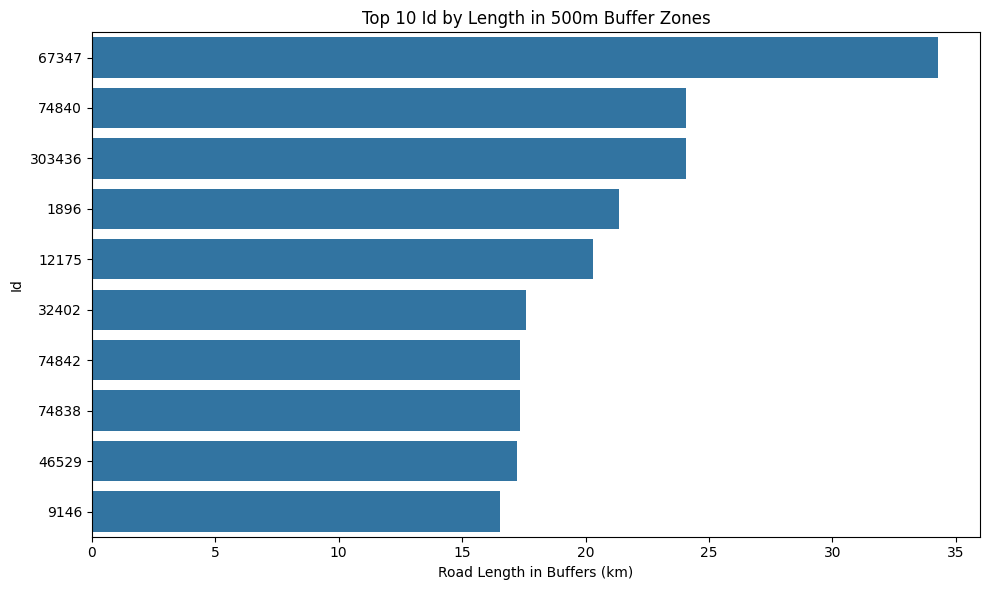

In [3]:
# Install libraries
!pip install geopandas pandas matplotlib seaborn folium shapely osmnx streamlit-folium --quiet

import geopandas as gpd
import osmnx as ox
import folium
from streamlit_folium import st_folium
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Buffering
buildings_file = "munich_commercial_buildings.geojson"
place_name = "Munich, Bavaria, Germany"
if not os.path.exists(buildings_file):
    print(f"{buildings_file} not found, downloading from OSM...")
    tags = {"building": "commercial"}
    buildings = ox.features_from_place(place_name, tags=tags)
    buildings = buildings[buildings.geom_type == "Polygon"]
    buildings = buildings.to_crs(epsg=25832)
    buildings.to_file(buildings_file, driver="GeoJSON")
    print(f"{buildings_file} downloaded and saved!")
else:
    print(f"Loading {buildings_file} from /content/...")
    buildings = gpd.read_file(buildings_file)
    buildings = buildings.to_crs(epsg=25832)

if "geometry" not in buildings.columns:
    raise ValueError("GeoDataFrame missing 'geometry' column")

print("Buildings non-geometry columns and unique types:")
for col in buildings.columns:
    if col != "geometry":
        unique_types = buildings[col].apply(type).unique()
        print(f"{col}: {unique_types}")

for col in buildings.columns:
    if col != "geometry":
        buildings[col] = buildings[col].astype(str)

buffers = buildings.buffer(500)
buffers_gdf = gpd.GeoDataFrame(geometry=buffers, crs="EPSG:25832")
buffers_gdf.to_file("munich_buffers_500m.geojson", driver="GeoJSON")
print("Buffers created and saved!")

m = folium.Map(location=[48.137154, 11.576124], zoom_start=12, tiles="CartoDB positron")
folium.GeoJson(
    buildings,
    style_function=lambda x: {"fillColor": "blue", "color": "blue", "weight": 1, "fillOpacity": 0.5},
    tooltip="Commercial Building"
).add_to(m)
folium.GeoJson(
    buffers_gdf,
    style_function=lambda x: {"fillColor": "green", "color": "green", "weight": 1, "fillOpacity": 0.3},
    tooltip="500m Buffer"
).add_to(m)
m.save("munich_buffers_map.html")
print("Buffer map saved as munich_buffers_map.html")
st_folium(m, width=700, height=500)

# Spatial join
roads_file = "munich_roads.geojson"
if not os.path.exists(roads_file):
    print(f"{roads_file} not found, downloading from OSM...")
    roads = ox.graph_from_place(place_name, network_type="all")
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False)
    roads_gdf = roads_gdf.to_crs(epsg=25832)
    roads_gdf.to_file(roads_file, driver="GeoJSON")
    print(f"{roads_file} downloaded and saved!")
else:
    print(f"Loading {roads_file} from /content/...")
    roads_gdf = gpd.read_file(roads_file)
    roads_gdf = roads_gdf.to_crs(epsg=25832)

if "geometry" not in roads_gdf.columns:
    raise ValueError("GeoDataFrame missing 'geometry' column")

print("Roads non-geometry columns and unique types:")
for col in roads_gdf.columns:
    if col != "geometry":
        unique_types = roads_gdf[col].apply(type).unique()
        print(f"{col}: {unique_types}")

for col in roads_gdf.columns:
    if col != "geometry":
        roads_gdf[col] = roads_gdf[col].astype(str)

roads_in_buffers = gpd.sjoin(roads_gdf, buffers_gdf, how="inner", predicate="intersects")
for col in roads_in_buffers.columns:
    if col != "geometry":
        roads_in_buffers[col] = roads_in_buffers[col].astype(str)
roads_in_buffers.to_file("roads_in_buffers.geojson", driver="GeoJSON")
print(f"Found {len(roads_in_buffers)} roads within 500m of commercial buildings")

total_length = roads_in_buffers.geometry.length.sum() / 1000
print(f"Total road length in buffer zones: {total_length:.2f} km")
with open("analysis_results.txt", "a") as f:
    f.write(f"Total road length in buffer zones: {total_length:.2f} km\n")

m = folium.Map(location=[48.137154, 11.576124], zoom_start=12, tiles="CartoDB positron")
folium.GeoJson(
    buildings,
    style_function=lambda x: {"fillColor": "blue", "color": "blue", "weight": 1, "fillOpacity": 0.5},
    tooltip="Commercial Building"
).add_to(m)
folium.GeoJson(
    buffers_gdf,
    style_function=lambda x: {"fillColor": "green", "color": "green", "weight": 1, "fillOpacity": 0.3},
    tooltip="500m Buffer"
).add_to(m)
folium.GeoJson(
    roads_in_buffers,
    style_function=lambda x: {"color": "red", "weight": 2},
    tooltip="Road in Buffer"
).add_to(m)
m.save("munich_spatial_join_map.html")
print("Spatial join map saved as munich_spatial_join_map.html")
st_folium(m, width=700, height=500)

# Bar chart
print("Columns in roads_in_buffers:", roads_in_buffers.columns.tolist())
roads_in_buffers["length_km"] = roads_in_buffers["geometry"].length / 1000
group_col = "name" if "name" in roads_in_buffers.columns else "highway" if "highway" in roads_in_buffers.columns else None
if group_col is None:
    print("No suitable column ('name' or 'highway') found, using index as identifier")
    roads_in_buffers["id"] = roads_in_buffers.index.astype(str)
    group_col = "id"

road_lengths = roads_in_buffers.groupby(group_col)["length_km"].sum()
road_lengths = road_lengths.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=road_lengths.values, y=road_lengths.index)
plt.xlabel("Road Length in Buffers (km)")
plt.ylabel(group_col.capitalize())
plt.title(f"Top 10 {group_col.capitalize()} by Length in 500m Buffer Zones")
plt.tight_layout()
plt.savefig("road_lengths_chart.png")
plt.show()


# Step 3: Clustering and Optimization
- **Clustering**: Gruppierung von Gebäuden und Straßen für Knotenplatzierung.
  - K-means: Zentroid-basierte Clusterbildung.
  - DBSCAN: Dichte-basierte Clusterbildung.
- **Spatial Database**: PostGIS für räumliche Abfragen.
  - Spatial Query: Räumliche Abfrage (z.B. Gebäude in Clustern zählen).
  - GiST Index: Räumlicher Index für Performance.
- **Optimization**: Optimierung der Glasfaserknotenstandorte.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.0 MB/s eta 0:00:00
Buildings non-geometry columns and types before conversion:
element: [<class 'str'>]
id: [<class 'int'>]
addr:city: [<class 'NoneType'> <class 'str'>]
addr:country: [<class 'NoneType'> <class 'str'>]
addr:housenumber: [<class 'NoneType'> <class 'str'>]
addr:street: [<class 'NoneType'> <class 'str'>]
building: [<class 'str'>]
name: [<class 'str'> <class 'NoneType'>]
building:levels: [<class 'str'> <class 'NoneType'>]
building:material: [<class 'NoneType'> <class 'str'>]
layer: [<class 'NoneType'> <class 'str'>]
roof:shape: [<class 'str'> <class 'NoneType'>]
addr:postcode: [<class 'NoneType'> <class 'str'>]
alt_name: [<class 'NoneType'> <class 'str'>]
office: [<class 'NoneType'> <class 'str'>]
old_name: [<class 'NoneType'> <class 'str'>]
phone: [<class 'NoneType'> <class 'str'>]
roof:colour: [<class 'NoneType'> <class 'str'>]
roof:levels: [<class 'str'> <class 'NoneType'>]
website: [<class 'NoneType'> <class 'st

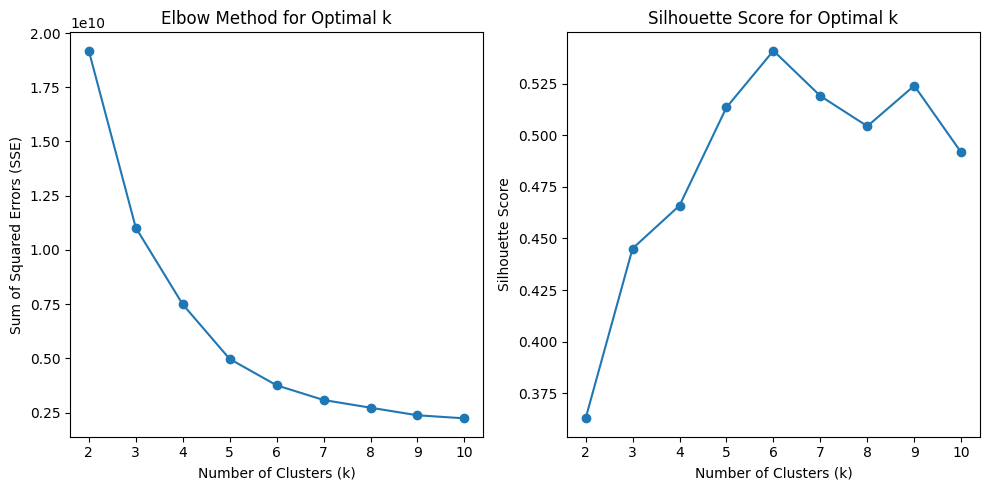

Cluster column type: int64
Unique cluster values: [4 2 0 1 3]
Cluster centroids saved as cluster_centroids.geojson
Building centroids non-geometry columns and types before conversion:
element: [<class 'str'>]
id: [<class 'str'>]
addr:city: [<class 'NoneType'> <class 'str'>]
addr:country: [<class 'NoneType'> <class 'str'>]
addr:housenumber: [<class 'NoneType'> <class 'str'>]
addr:street: [<class 'NoneType'> <class 'str'>]
building: [<class 'str'>]
name: [<class 'str'> <class 'NoneType'>]
building:levels: [<class 'str'> <class 'NoneType'>]
building:material: [<class 'NoneType'> <class 'str'>]
layer: [<class 'NoneType'> <class 'str'>]
roof:shape: [<class 'str'> <class 'NoneType'>]
addr:postcode: [<class 'NoneType'> <class 'str'>]
alt_name: [<class 'NoneType'> <class 'str'>]
office: [<class 'NoneType'> <class 'str'>]
old_name: [<class 'NoneType'> <class 'str'>]
phone: [<class 'NoneType'> <class 'str'>]
roof:colour: [<class 'NoneType'> <class 'str'>]
roof:levels: [<class 'str'> <class 'None

2025-06-19 16:48:44.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:48:44.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:48:44.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:48:44.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 16:48:45.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


PostGIS setup skipped or failed: could not translate host name "your_host" to address: Name or service not known



In [4]:
# Install libraries
!pip install geopandas pandas matplotlib seaborn folium shapely osmnx streamlit-folium scikit-learn psycopg2-binary --quiet

import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import folium
from streamlit_folium import st_folium
import psycopg2
import os

# Task 2: Clustering
buildings_file = "munich_commercial_buildings.geojson"
roads_in_buffers_file = "roads_in_buffers.geojson"
if not os.path.exists(buildings_file) or not os.path.exists(roads_in_buffers_file):
    raise FileNotFoundError("Required files from Step 2 missing. Run Step 2 first.")

buildings = gpd.read_file(buildings_file).to_crs(epsg=25832)
roads_in_buffers = gpd.read_file(roads_in_buffers_file).to_crs(epsg=25832)

if "geometry" not in buildings.columns or "geometry" not in roads_in_buffers.columns:
    raise ValueError("GeoDataFrame missing 'geometry' column")

print("Buildings non-geometry columns and types before conversion:")
for col in buildings.columns:
    if col != "geometry":
        unique_types = buildings[col].apply(type).unique()
        print(f"{col}: {unique_types}")
        buildings[col] = buildings[col].apply(lambda x: str(x) if not pd.isna(x) else x)

buildings.to_file(buildings_file, driver="GeoJSON")

building_centroids = buildings.copy()
building_centroids["geometry"] = building_centroids["geometry"].centroid
coords = np.array([[geom.x, geom.y] for geom in building_centroids["geometry"]])

sse = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    sse.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(coords, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.tight_layout()
plt.savefig("clustering_metrics.png")
plt.show()

optimal_k = 5  # Adjust based on plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
building_centroids["cluster"] = kmeans.fit_predict(coords).astype(int)

print("Cluster column type:", building_centroids["cluster"].dtype)
print("Unique cluster values:", building_centroids["cluster"].unique())

cluster_centroids = []
for cluster in building_centroids["cluster"].unique():
    cluster_points = building_centroids[building_centroids["cluster"] == cluster]["geometry"]
    if not cluster_points.empty:
        mean_x = cluster_points.x.mean()
        mean_y = cluster_points.y.mean()
        cluster_centroids.append({"geometry": gpd.points_from_xy([mean_x], [mean_y])[0], "cluster": int(cluster)})
cluster_centroids_gdf = gpd.GeoDataFrame(cluster_centroids, crs="EPSG:25832")
cluster_centroids_gdf.to_file("cluster_centroids.geojson", driver="GeoJSON")
print("Cluster centroids saved as cluster_centroids.geojson")

# Task 3: Visualize Clusters
print("Building centroids non-geometry columns and types before conversion:")
for col in building_centroids.columns:
    if col != "geometry":
        unique_types = building_centroids[col].apply(type).unique()
        print(f"{col}: {unique_types}")
        building_centroids[col] = building_centroids[col].apply(lambda x: str(x) if not pd.isna(x) else x)

m = folium.Map(location=[48.137154, 11.576124], zoom_start=12, tiles="CartoDB positron")
colors = ["blue", "green", "red", "purple", "orange"]
for cluster in building_centroids["cluster"].unique():
    cluster_gdf = building_centroids[building_centroids["cluster"] == cluster]
    folium.GeoJson(
        cluster_gdf,
        style_function=lambda x, c=colors[int(cluster) % len(colors)]: {
            "fillColor": c,
            "color": c,
            "weight": 1,
            "fillOpacity": 0.5,
        },
        tooltip=f"Cluster {int(cluster)}"
    ).add_to(m)

folium.GeoJson(
    roads_in_buffers,
    style_function=lambda x: {"color": "black", "weight": 2},
    tooltip="Road in Buffer"
).add_to(m)

for idx, row in cluster_centroids_gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Node {int(row.cluster)}",
        icon=folium.Icon(color="red", icon="star")
    ).add_to(m)

m.save("munich_clusters_map.html")
print("Cluster map saved as munich_clusters_map.html")
st_folium(m, width=700, height=500)

# Task 4: PostGIS (Optional)
db_params = {
    "host": "your_host",
    "database": "your_database",
    "user": "your_user",
    "password": "your_password"
}

try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS buildings (
            id SERIAL PRIMARY KEY,
            cluster INTEGER,
            geom GEOMETRY(Point, 25832)
        );
    """)

    for idx, row in building_centroids.iterrows():
        cursor.execute(
            "INSERT INTO buildings (cluster, geom) VALUES (%s, ST_SetSRID(ST_MakePoint(%s, %s), 25832))",
            (int(row["cluster"]), row.geometry.x, row.geometry.y)
        )

    conn.commit()
    cursor.execute("SELECT cluster, COUNT(*) as count FROM buildings GROUP BY cluster;")
    results = cursor.fetchall()
    print("Buildings per cluster:")
    for row in results:
        print(f"Cluster {row[0]}: {row[1]} buildings")

    with open("analysis_results.txt", "a") as f:
        f.write("Buildings per cluster:\n")
        for row in results:
            f.write(f"Cluster {row[0]}: {row[1]} buildings\n")

    cursor.close()
    conn.close()
except Exception as e:
    print(f"PostGIS setup skipped or failed: {e}")


